In [ ]:
import pandas as pd
import os
import shutil

In [ ]:
#Create the data for positive samples

FILE_PATH = "covid-chestxray\metadata.csv"
IMAGE_PATH = "covid-chestxray\images"

In [ ]:
df = pd.read_csv(FILE_PATH)
print(df.shape)
df.head()

(950, 30)
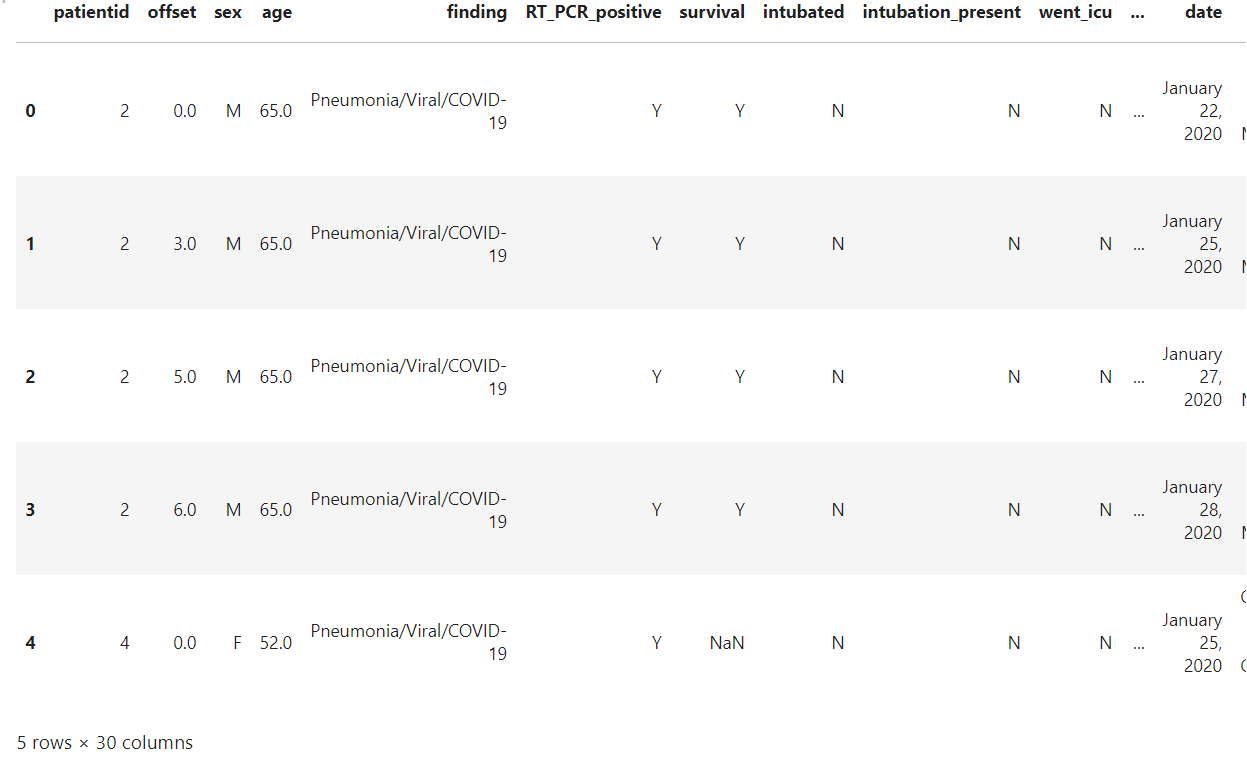

# Load Datasets


In [ ]:
TARGET_DIR = "Dataset/Train/Covid"

if not os.path.exists(TARGET_DIR):
    os.mkdir(TARGET_DIR)
    print("Covid FOlder Created")

In [ ]:
cnt = 0
for(i,row) in df.iterrows():
    if row["finding"] == "COVID-19" and row["view"] =="PA":
        filename = row["filename"]
        image_path = os.path.join(IMAGE_PATH,filename) #IMAGE_PATH + filename
        image_copy_path = os.path.join(TARGET_DIR,filename) #TARGET_DIR + filename
        shutil.copy2(image_path,image_copy_path) #Copy From IMAGE_PATH to TARGET_DIrectory

        cnt+=1
# print(cnt)

In [ ]:
import random
KAGGLE_FILE_PATH = "chest_xray\\train\\NORMAL"
TARGET_NORMAL_DIR = "Dataset\\Train\\Normal"
if not os.path.exists(TARGET_NORMAL_DIR):
    os.mkdir(TARGET_NORMAL_DIR)
    print("Normal Folder Created")

image_names = os.listdir(KAGGLE_FILE_PATH) #COntains list of all image names
# images_names
random.shuffle(image_names) #it will randomly shuffle names in list

for i in range(144):
    image_name = image_names[i]
    image_path = os.path.join(KAGGLE_FILE_PATH,image_name)

    target_path = os.path.join(TARGET_NORMAL_DIR,image_name)
    shutil.copy2(image_path,target_path)
#     print("Moved",i)

In [ ]:
#train & validate
TRAIN_PATH = "Dataset/Train"
VAL_PATH = "Dataset/Val"

# Importing Required Libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

# Architecture

defines a CNN model with convolutional layers, max pooling, dropout, and dense layers for COVID-19 detection from images.



In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss=keras.losses.binary_crossentropy,optimizer = "adam",metrics=["accuracy"])